<a href="https://colab.research.google.com/github/niharraju4/Hyperparameter_tuning/blob/main/Hyperparameter_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                                     Hyperparameter Tuning

 # **Hyperparameters** are different parameter values that are used to control the learning process and have a significant effect on the performance of machine learning models.

*   This process plays a vital role in the prediction accuracy of a machine
learning algorithm.

*   Most of these machine learning algorithms come with the default values of their hyperparameters. But the default values do not always perform well on different types of Machine Learning projects. This is why you need to optimize them in order to get the right combination that will give you the best performance.



## **How to optimize hyperparameters**


 # **Grid Search**

1.   This is a widely used and traditional method that performs hyperparameter tuning to determine the optimal values for a given model.

2.   Grid search works by trying every possible combination of parameters you want to try in your model. This means it will take a lot of time to perform the entire search which can get very computationally expensive.


# Random Search


1.   This method works a bit differently: random combinations of the values of the hyperparameters are used to find the best solution for the built model.
2.   The drawback of Random Search is that it can sometimes miss important points (values) in the search space.




In [29]:
pip install hyperopt

# Import Libararies

In [30]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from hyperopt.pyll.base import scope
import warnings
warnings.filterwarnings('ignore')

# Dataset

In [31]:
df= pd.read_csv(r"/content/House_Rent_Dataset.csv")

# Intial Overview

In [32]:
df.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [33]:
df.tail(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4736,2022-06-28,3,15000,1500,Lower Basement out of 2,Super Area,Almasguda,Hyderabad,Semi-Furnished,Family,3,Contact Owner
4737,2022-07-07,3,15000,1500,Lower Basement out of 2,Super Area,Almasguda,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4738,2022-07-06,2,17000,855,4 out of 5,Carpet Area,"Godavari Homes, Quthbullapur",Hyderabad,Unfurnished,Bachelors,2,Contact Agent
4739,2022-07-06,2,25000,1040,2 out of 4,Carpet Area,Gachibowli,Hyderabad,Unfurnished,Bachelors,2,Contact Owner
4740,2022-06-02,2,12000,1350,2 out of 2,Super Area,Old Alwal,Hyderabad,Unfurnished,Bachelors/Family,2,Contact Owner
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent
4745,2022-05-04,2,15000,1000,4 out of 5,Carpet Area,Suchitra Circle,Hyderabad,Unfurnished,Bachelors,2,Contact Owner


In [34]:
df.shape

(4746, 12)

In [35]:
df.size

56952

In [36]:
df.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [37]:
df.index

RangeIndex(start=0, stop=4746, step=1)

In [38]:
df.dtypes

,0
Posted On,object
BHK,int64
Rent,int64
Size,int64
Floor,object
Area Type,object
Area Locality,object
City,object
Furnishing Status,object
Tenant Preferred,object


In [39]:
df.ndim # number of dimensions

2

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [41]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [42]:
df.describe(include='all')

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
count,4746,4746.000000,4.746000e+03,4746.000000,4746,4746,4746,4746,4746,4746,4746.000000,4746
unique,81,NaN,NaN,NaN,480,3,2235,6,3,3,NaN,3
top,2022-07-06,NaN,NaN,NaN,1 out of 2,Super Area,Bandra West,Mumbai,Semi-Furnished,Bachelors/Family,NaN,Contact Owner
freq,311,NaN,NaN,NaN,379,2446,37,972,2251,3444,NaN,3216
mean,NaN,2.083860,3.499345e+04,967.490729,NaN,NaN,NaN,NaN,NaN,NaN,1.965866,NaN
std,NaN,0.832256,7.810641e+04,634.202328,NaN,NaN,NaN,NaN,NaN,NaN,0.884532,NaN
min,NaN,1.000000,1.200000e+03,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,2.000000,1.000000e+04,550.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
50%,NaN,2.000000,1.600000e+04,850.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN
75%,NaN,3.000000,3.300000e+04,1200.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN


# Missing/ duplicate data

In [43]:
df.isnull().sum()

,0
Posted On,0
BHK,0
Rent,0
Size,0
Floor,0
Area Type,0
Area Locality,0
City,0
Furnishing Status,0
Tenant Preferred,0


In [44]:
df.isnull().any()         # True/False if any nulls per column

,0
Posted On,False
BHK,False
Rent,False
Size,False
Floor,False
Area Type,False
Area Locality,False
City,False
Furnishing Status,False
Tenant Preferred,False


In [45]:
df.notnull().sum()        # Non-null counts

,0
Posted On,4746
BHK,4746
Rent,4746
Size,4746
Floor,4746
Area Type,4746
Area Locality,4746
City,4746
Furnishing Status,4746
Tenant Preferred,4746


In [46]:
df.duplicated().sum()     # Number of duplicated rows

np.int64(0)

In [47]:
missing_percentages = (df.isnull().sum() / len(df)) * 100
print(missing_percentages.sort_values(ascending=False))

Posted On            0.0
BHK                  0.0
Rent                 0.0
Size                 0.0
Floor                0.0
Area Type            0.0
Area Locality        0.0
City                 0.0
Furnishing Status    0.0
Tenant Preferred     0.0
Bathroom             0.0
Point of Contact     0.0
dtype: float64


In [48]:
df.corr(numeric_only=True) # correlation matrix

,BHK,Rent,Size,Bathroom
BHK,1.000000,0.369718,0.716145,0.794885
Rent,0.369718,1.000000,0.413551,0.441215
Size,0.716145,0.413551,1.000000,0.740703
Bathroom,0.794885,0.441215,0.740703,1.000000


In [49]:
df.cov(numeric_only=True) #Covariance matrix

,BHK,Rent,Size,Bathroom
BHK,0.692650,2.403331e+04,3.779947e+02,0.585160
Rent,24033.314515,6.100612e+09,2.048535e+07,30482.499287
Size,377.994666,2.048535e+07,4.022126e+05,415.513698
Bathroom,0.585160,3.048250e+04,4.155137e+02,0.782396


In [50]:
df.duplicated().sum() # Duplicate rows

np.int64(0)

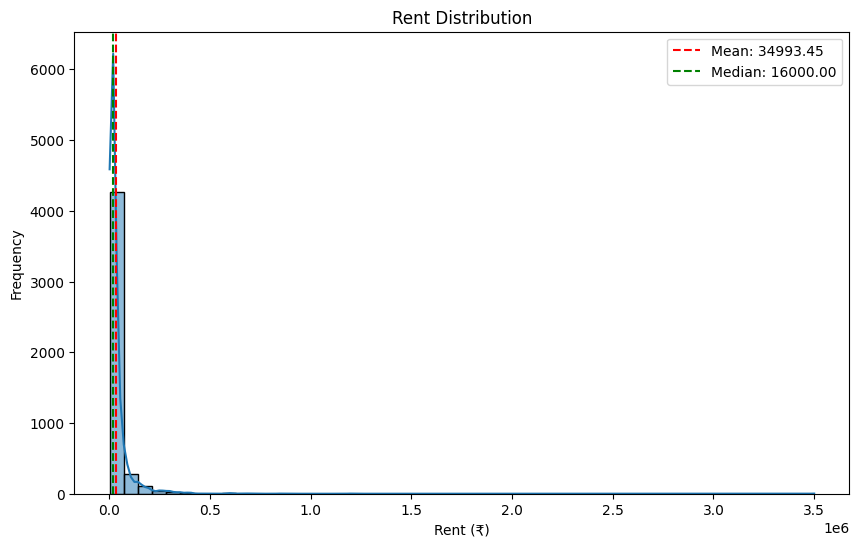

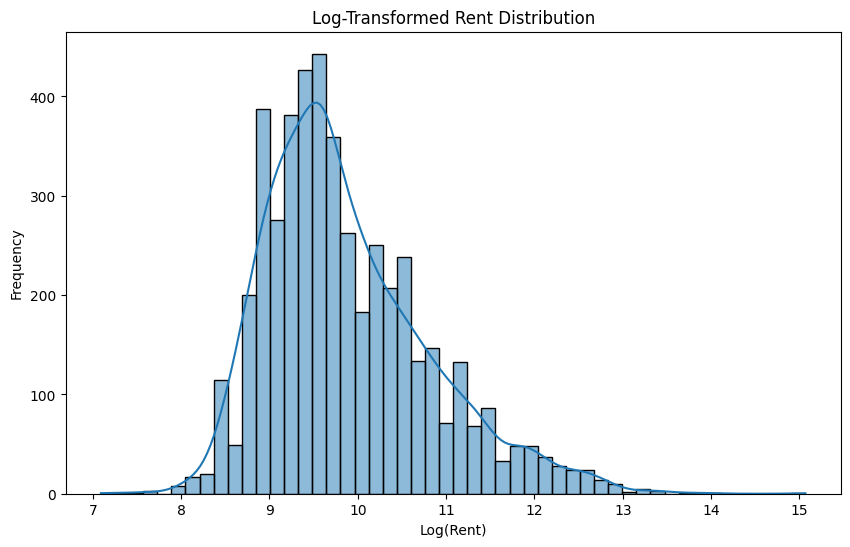

In [51]:
# Plot rent distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['Rent'], bins=50, kde=True)
plt.title('Rent Distribution')
plt.xlabel('Rent (₹)')
plt.ylabel('Frequency')
plt.axvline(df['Rent'].mean(), color='red', linestyle='--', label=f'Mean: {df["Rent"].mean():.2f}')
plt.axvline(df['Rent'].median(), color='green', linestyle='--', label=f'Median: {df["Rent"].median():.2f}')
plt.legend()
plt.show()

# Log transformation for skewed rent distribution
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df['Rent']), bins=50, kde=True)
plt.title('Log-Transformed Rent Distribution')
plt.xlabel('Log(Rent)')
plt.ylabel('Frequency')
plt.show()

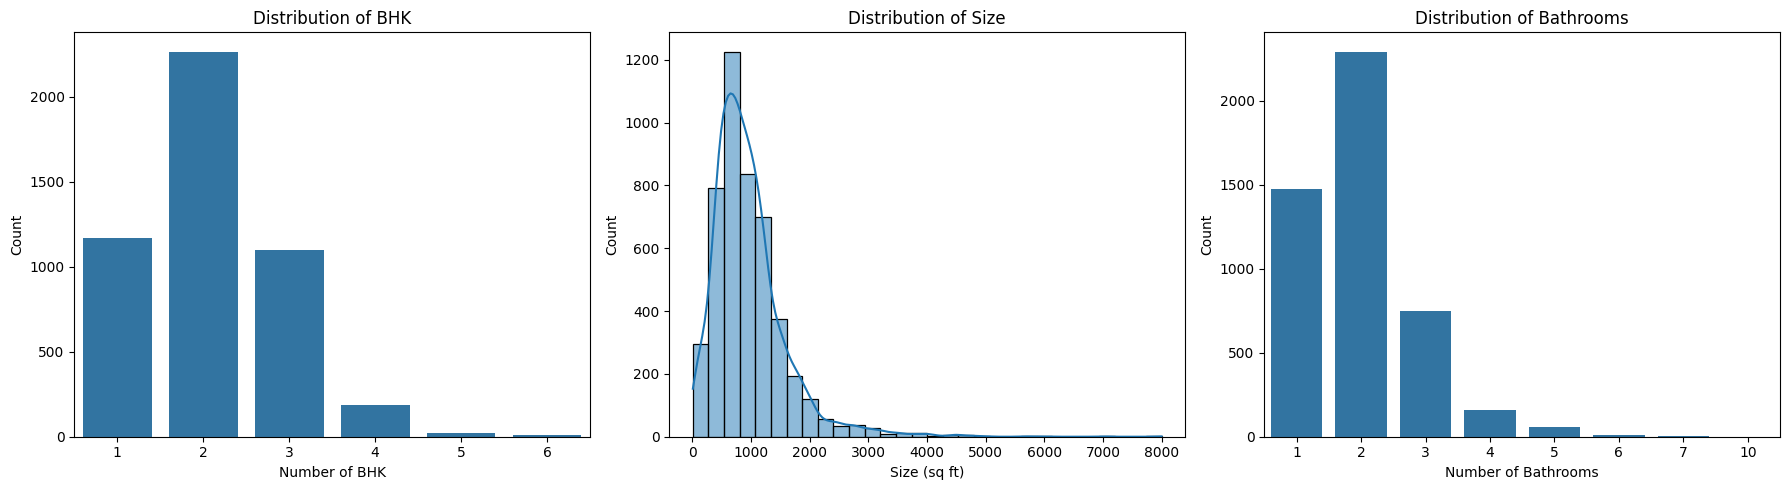

In [52]:
# Distribution of key numerical features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# BHK Distribution
sns.countplot(x='BHK', data=df, ax=axes[0])
axes[0].set_title('Distribution of BHK')
axes[0].set_xlabel('Number of BHK')
axes[0].set_ylabel('Count')

# Size Distribution
sns.histplot(df['Size'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Size')
axes[1].set_xlabel('Size (sq ft)')
axes[1].set_ylabel('Count')

# Bathroom Distribution
sns.countplot(x='Bathroom', data=df, ax=axes[2])
axes[2].set_title('Distribution of Bathrooms')
axes[2].set_xlabel('Number of Bathrooms')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()


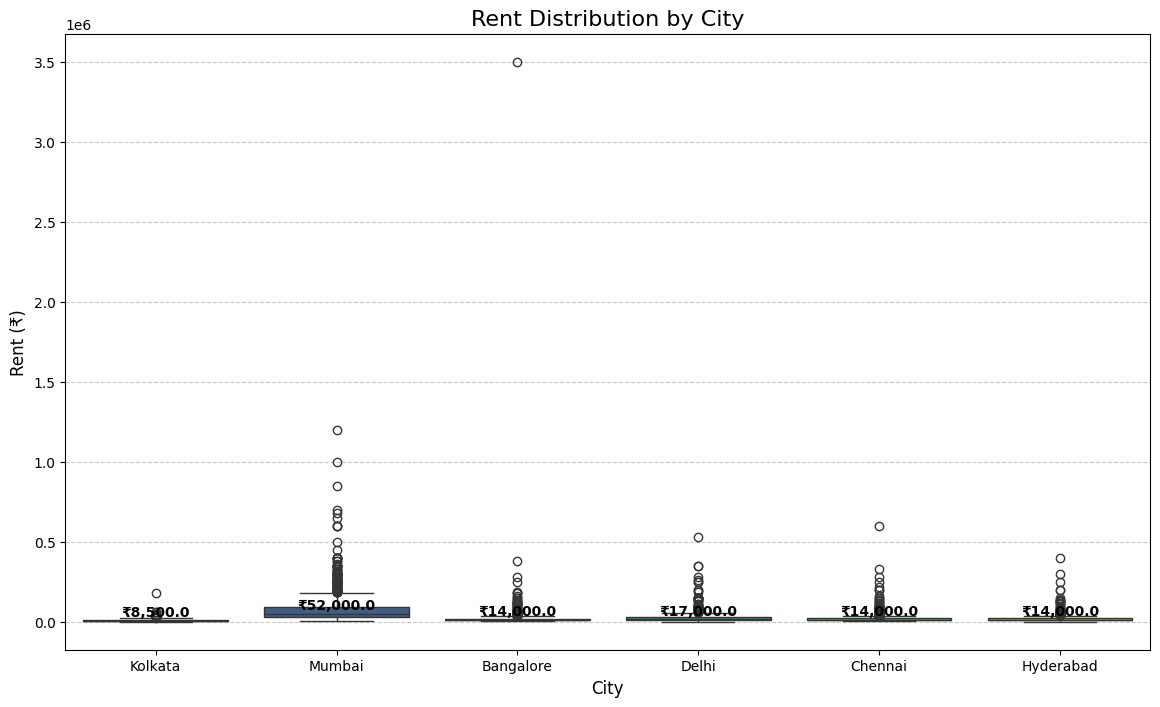

In [53]:
# Create a figure for boxplot with better visibility
plt.figure(figsize=(14, 8))
sns.boxplot(x='City', y='Rent', data=df, palette='viridis')
plt.title('Rent Distribution by City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Rent (₹)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add median values as text on the plot
for i, city in enumerate(df['City'].unique()):
    median_rent = df[df['City'] == city]['Rent'].median()
    plt.text(i, median_rent + 5000, f'₹{median_rent:,}',
             ha='center', va='bottom', fontweight='bold')

plt.show()

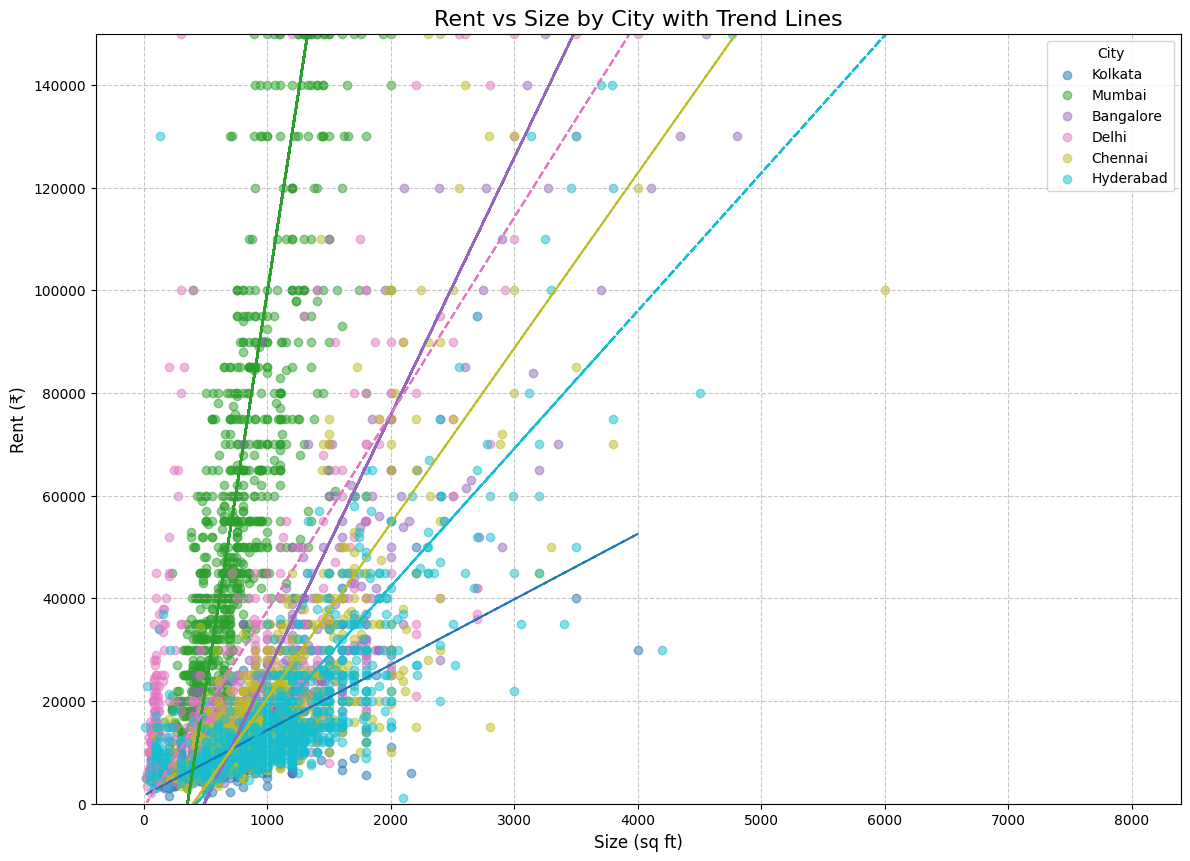

In [54]:
# Create a scatter plot with regression lines for each city
plt.figure(figsize=(14, 10))

# Create a colormap for cities
cities = df['City'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(cities)))
city_color_map = dict(zip(cities, colors))

# Plot each city with a different color
for city in cities:
    city_data = df[df['City'] == city]
    plt.scatter(city_data['Size'], city_data['Rent'],
                alpha=0.5,
                color=city_color_map[city],
                label=city)

    # Add regression line
    x = city_data['Size']
    y = city_data['Rent']
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x), color=city_color_map[city], linestyle='--')

plt.title('Rent vs Size by City with Trend Lines', fontsize=16)
plt.xlabel('Size (sq ft)', fontsize=12)
plt.ylabel('Rent (₹)', fontsize=12)
plt.legend(title='City')
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, 150000)  # Limiting y-axis for better visibility
plt.show()

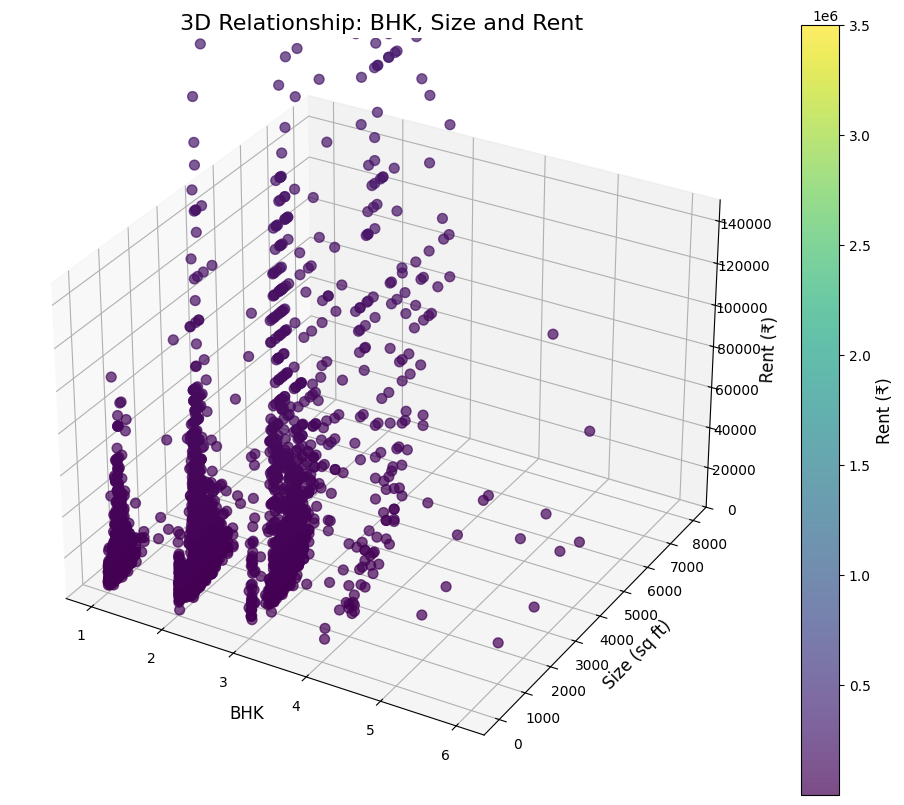

In [55]:
# 3D scatter plot to visualize relationships between three numerical variables
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Create scatter plot
scatter = ax.scatter(df['BHK'],
                    df['Size'],
                    df['Rent'],
                    c=df['Rent'],  # Color by rent
                    cmap='viridis',
                    alpha=0.7,
                    s=50)

# Add labels
ax.set_xlabel('BHK', fontsize=12)
ax.set_ylabel('Size (sq ft)', fontsize=12)
ax.set_zlabel('Rent (₹)', fontsize=12)
ax.set_title('3D Relationship: BHK, Size and Rent', fontsize=16)

# Add a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Rent (₹)', fontsize=12)

# Set axis limits for better visualization
ax.set_zlim(0, 150000)

plt.show()

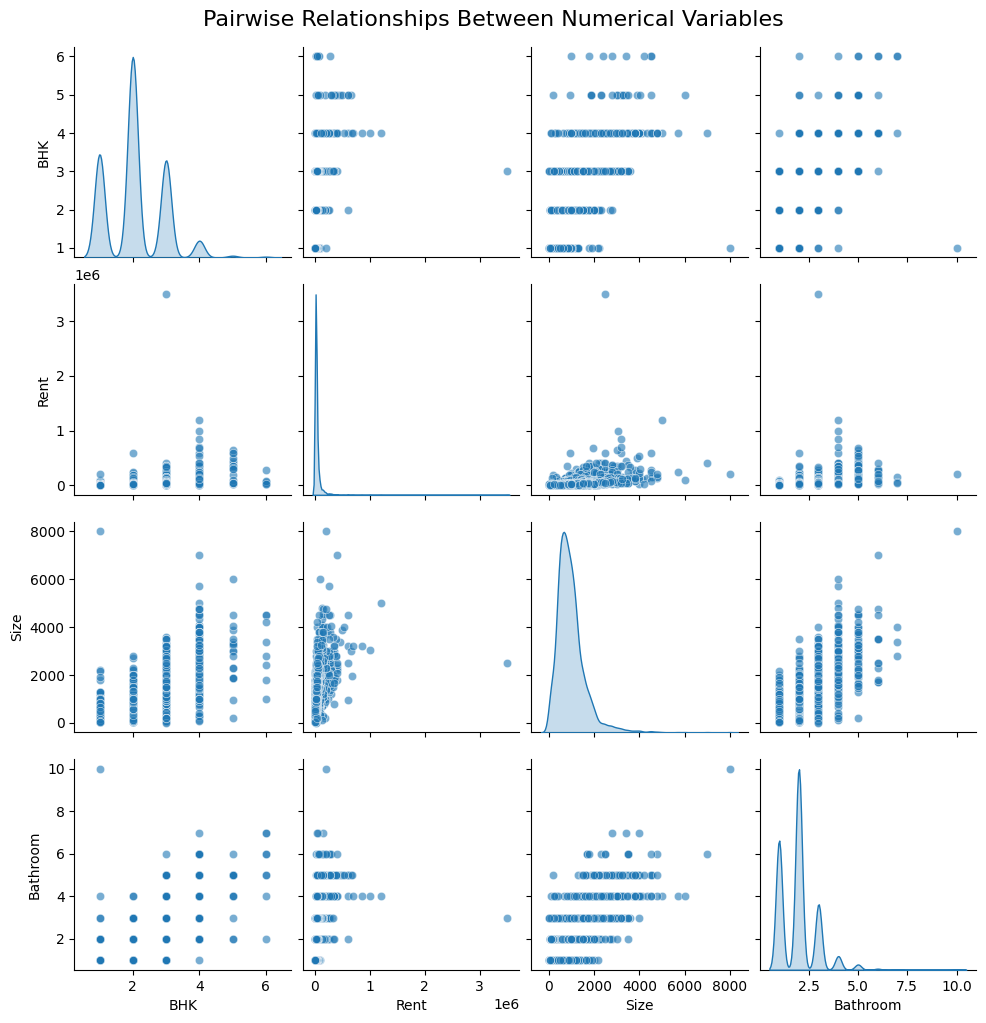

In [56]:
# Create a pairplot to visualize relationships between all numerical variables
numerical_data = df[['BHK', 'Rent', 'Size', 'Bathroom']]
sns.pairplot(numerical_data, diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairwise Relationships Between Numerical Variables', y=1.02, fontsize=16)
plt.show()

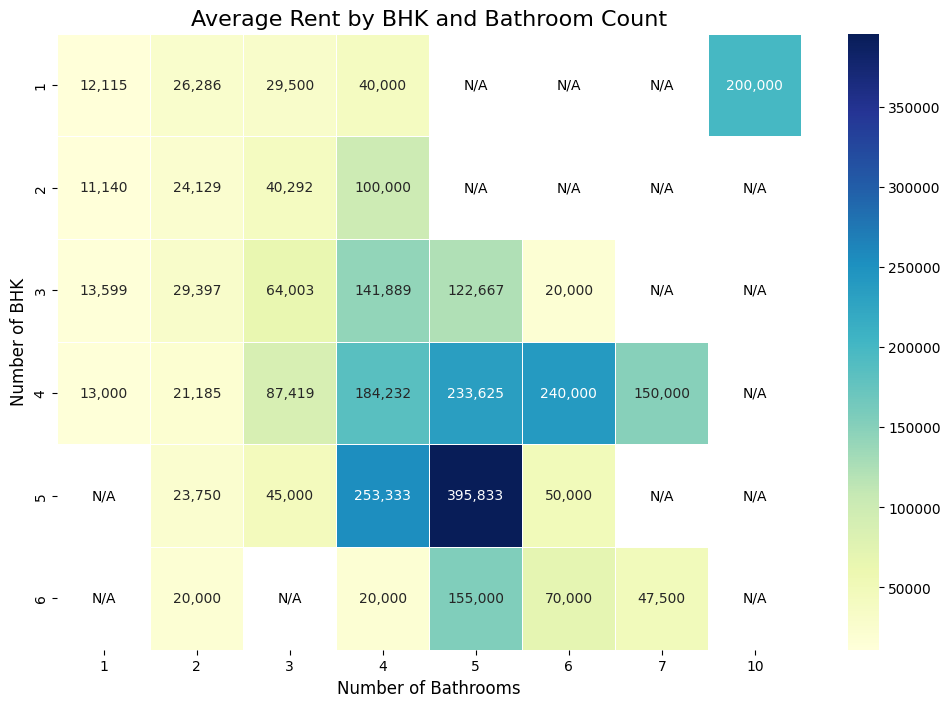

In [58]:
# Create pivot table for average rent by BHK and Bathroom
bhk_bath_pivot = df.pivot_table(
    values='Rent',
    index='BHK',
    columns='Bathroom',
    aggfunc='mean'
)

# Create heatmap
plt.figure(figsize=(12, 8))
# Change the format code to '.0f' to display floats with no decimal places
# or to '.2f' to display with 2 decimal places as needed.
heatmap = sns.heatmap(bhk_bath_pivot, annot=True, fmt=',.0f', cmap='YlGnBu', linewidths=.5)
plt.title('Average Rent by BHK and Bathroom Count', fontsize=16)
plt.xlabel('Number of Bathrooms', fontsize=12)
plt.ylabel('Number of BHK', fontsize=12)

# Add annotations for missing combinations
for i, idx in enumerate(bhk_bath_pivot.index):
    for j, col in enumerate(bhk_bath_pivot.columns):
        if pd.isna(bhk_bath_pivot.iloc[i, j]):
            heatmap.text(j + 0.5, i + 0.5, 'N/A',
                        ha='center', va='center', color='black')

plt.show()

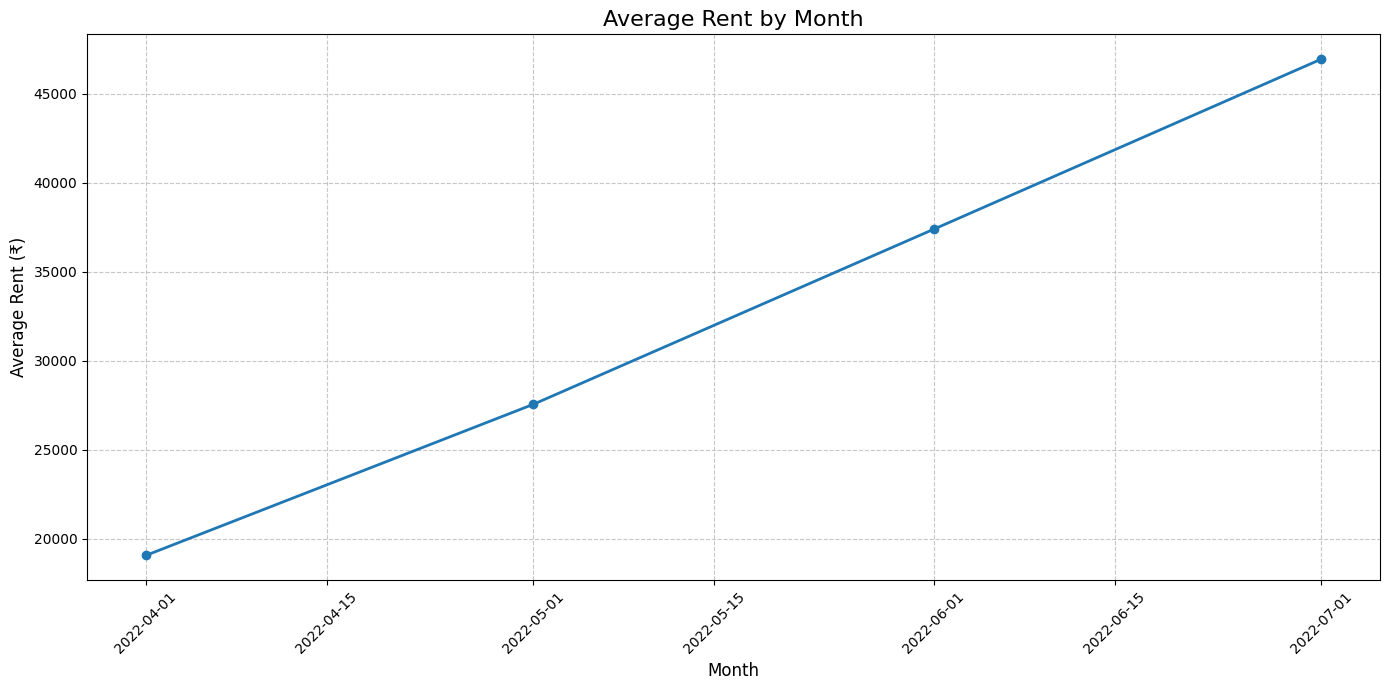

In [59]:
# Convert posting date to datetime
df['Posted On'] = pd.to_datetime(df['Posted On'])

# Group by month and calculate average rent
monthly_rent = df.groupby(df['Posted On'].dt.to_period('M'))['Rent'].mean().reset_index()
monthly_rent['Posted On'] = monthly_rent['Posted On'].dt.to_timestamp()

# Plot time series
plt.figure(figsize=(14, 7))
plt.plot(monthly_rent['Posted On'], monthly_rent['Rent'], marker='o', linestyle='-', linewidth=2)
plt.title('Average Rent by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Rent (₹)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

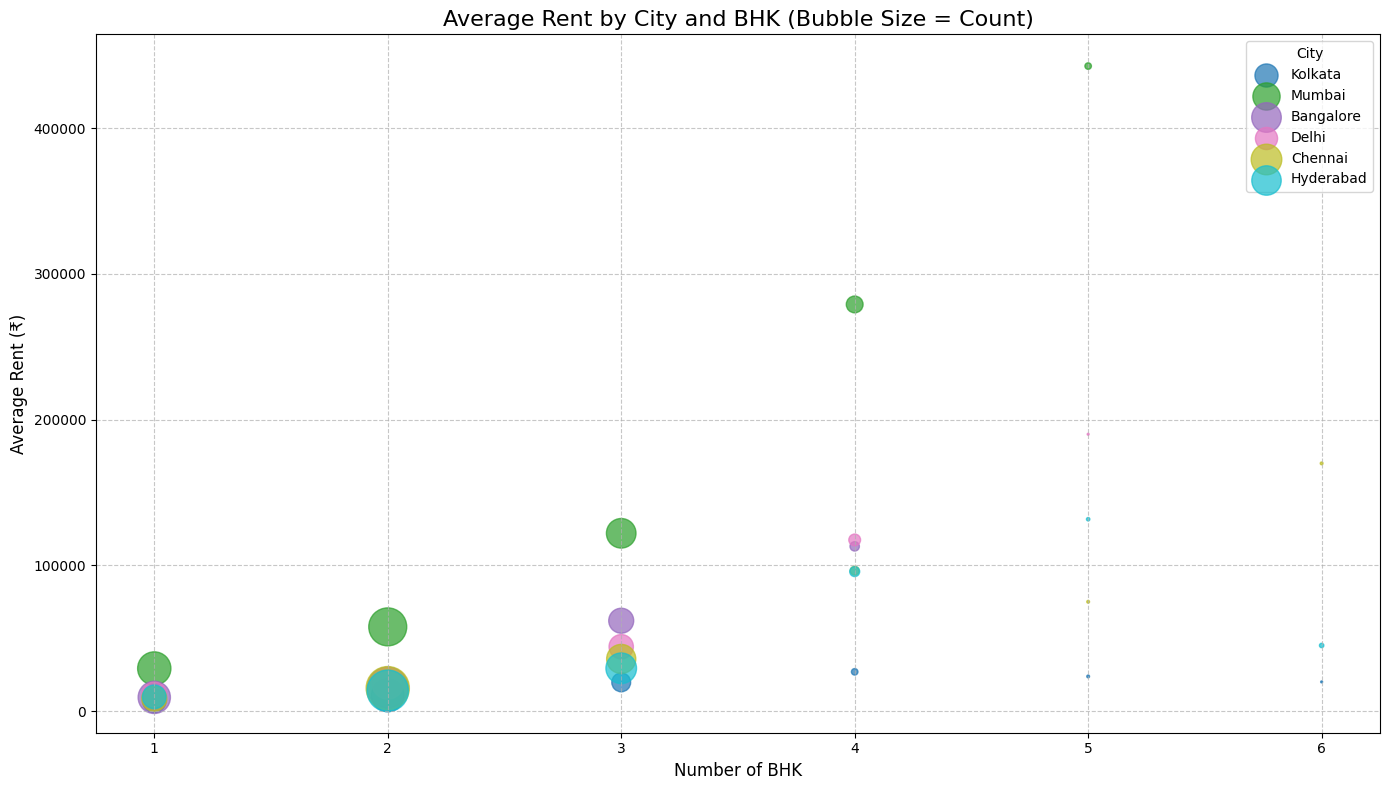

In [60]:
# Group data by City and BHK
city_bhk_data = df.groupby(['City', 'BHK']).agg(
    mean_rent=('Rent', 'mean'),
    count=('Rent', 'count')
).reset_index()

# Create bubble chart
plt.figure(figsize=(14, 8))

# Create colormap for cities
cities = df['City'].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(cities)))
city_color_map = dict(zip(cities, colors))

# Plot bubbles for each city
for city in cities:
    city_data = city_bhk_data[city_bhk_data['City'] == city]
    plt.scatter(city_data['BHK'],
                city_data['mean_rent'],
                s=city_data['count']*2,  # Size by count
                alpha=0.7,
                color=city_color_map[city],
                label=city)

plt.title('Average Rent by City and BHK (Bubble Size = Count)', fontsize=16)
plt.xlabel('Number of BHK', fontsize=12)
plt.ylabel('Average Rent (₹)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='City')
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

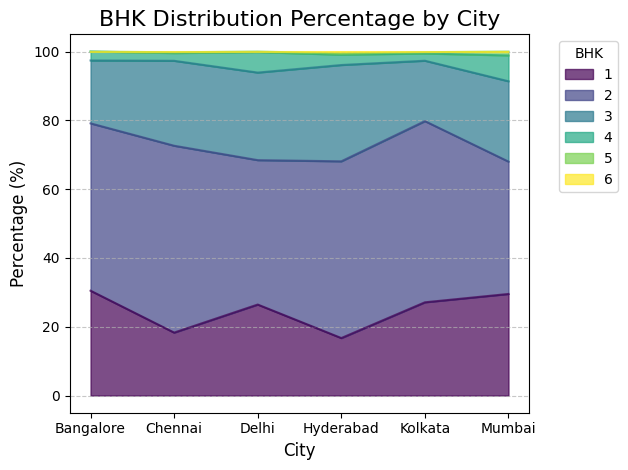

In [61]:
# Create a BHK distribution by city dataframe
bhk_city_dist = df.groupby(['City', 'BHK']).size().unstack().fillna(0)
bhk_city_dist_pct = bhk_city_dist.div(bhk_city_dist.sum(axis=1), axis=0) * 100

# Create an area chart
plt.figure(figsize=(14, 8))
bhk_city_dist_pct.plot(kind='area', stacked=True, colormap='viridis', alpha=0.7)
plt.title('BHK Distribution Percentage by City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='BHK', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [62]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Interactive scatter plot
fig = px.scatter(df,
                x='Size',
                y='Rent',
                color='City',
                size='BHK',
                hover_name='Area Locality',
                hover_data=['Bathroom', 'Furnishing Status'],
                title='Interactive Rent vs Size by City',
                labels={'Rent': 'Rent (₹)', 'Size': 'Size (sq ft)'},
                height=600)

fig.update_layout(
    legend_title_text='City',
    xaxis=dict(title='Size (sq ft)'),
    yaxis=dict(title='Rent (₹)'),
)

fig.show()

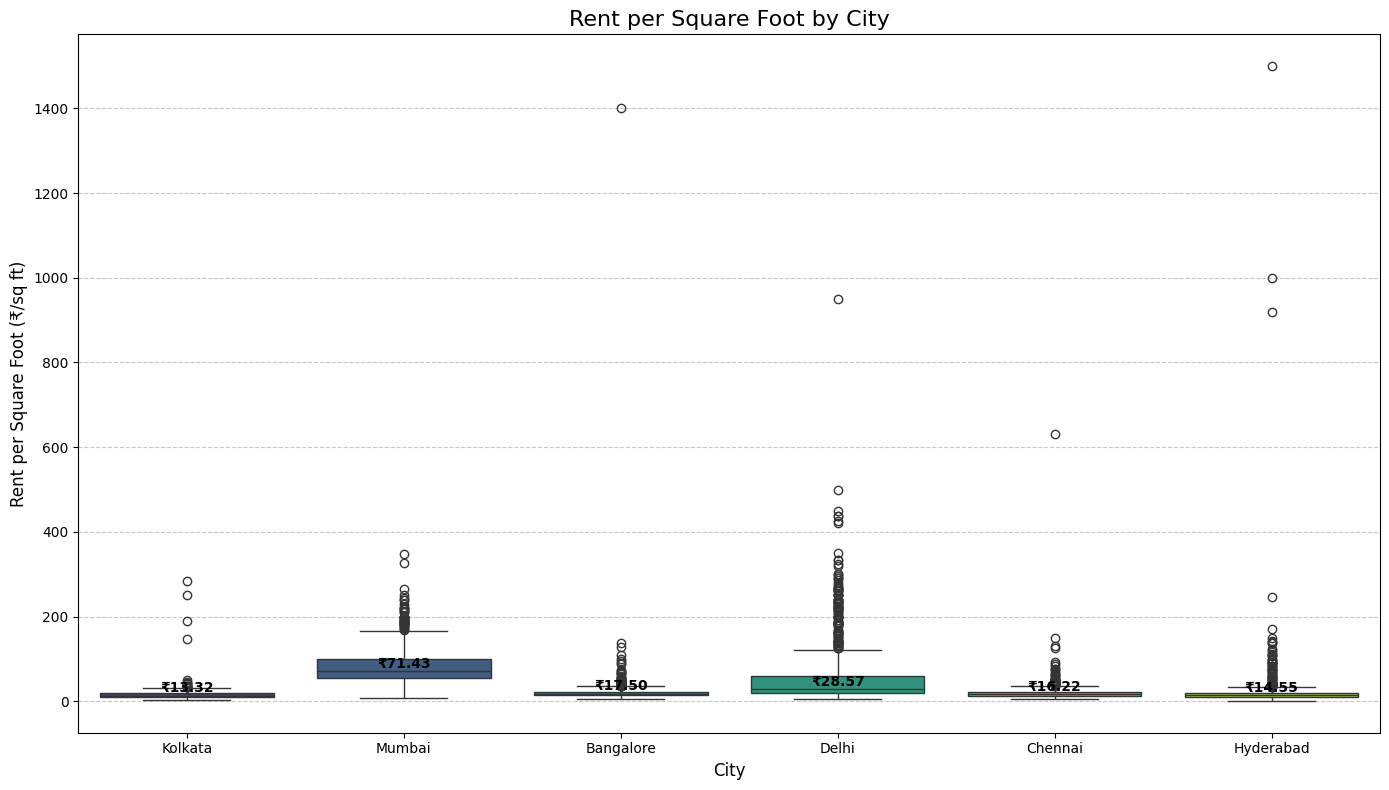

In [63]:
# Calculate rent per square foot
df['Rent_per_sqft'] = df['Rent'] / df['Size']

# Plot rent per square foot by city
plt.figure(figsize=(14, 8))
sns.boxplot(x='City', y='Rent_per_sqft', data=df, palette='viridis')
plt.title('Rent per Square Foot by City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Rent per Square Foot (₹/sq ft)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)

# Add median values as text
for i, city in enumerate(df['City'].unique()):
    median_rent_per_sqft = df[df['City'] == city]['Rent_per_sqft'].median()
    plt.text(i, median_rent_per_sqft + 1, f'₹{median_rent_per_sqft:.2f}',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [64]:
# Install folium if needed
!pip install folium

import folium
from folium.plugins import MarkerCluster

# City coordinates (approximate)
city_coords = {
    'Mumbai': [19.0760, 72.8777],
    'Delhi': [28.7041, 77.1025],
    'Bangalore': [12.9716, 77.5946],
    'Hyderabad': [17.3850, 78.4867],
    'Chennai': [13.0827, 80.2707],
    'Kolkata': [22.5726, 88.3639]
}

# Create city-wise rent averages
city_rents = df.groupby('City')['Rent'].mean().reset_index()

# Create the map
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# Add a marker for each city
for _, row in city_rents.iterrows():
    city = row['City']
    avg_rent = row['Rent']

    if city in city_coords:
        folium.Circle(
            location=city_coords[city],
            radius=avg_rent/10,  # Scale the circle based on rent
            popup=f"{city}<br>Average Rent: ₹{avg_rent:,.2f}",
            color='crimson',
            fill=True,
            fill_color='crimson'
        ).add_to(m)

        folium.Marker(
            location=city_coords[city],
            popup=f"{city}<br>Average Rent: ₹{avg_rent:,.2f}",
            icon=folium.Icon(color='blue')
        ).add_to(m)

# Display the map
m